In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/DATASETS/40,000balanced_data.csv"
rf = pd.read_csv(path)
rf

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,label
0,-0.294335,-0.555488,-0.004102,-0.001963,0.036686,-0.004291,0.891554,-0.343695,0.587586,0.976801,...,0.004662,-0.242535,-0.284611,-0.289261,-0.125412,-0.341319,-0.353259,-0.398044,-0.267539,0
1,-0.294335,-0.573751,-0.000463,0.000783,-0.024413,-0.001900,-0.142606,-0.343695,-0.107234,-0.067077,...,0.004693,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,0
2,-0.294335,-0.707085,0.001356,0.000783,0.172202,-0.003710,2.055378,-0.343695,0.975591,1.763125,...,0.004693,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,0
3,-0.294335,-0.412581,-0.002282,0.002156,-0.021802,-0.001317,0.006035,-0.343695,-0.007106,0.027734,...,0.004662,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,0
4,-0.319411,-0.716687,-0.015018,-0.006082,-0.109796,-0.004328,-0.566390,1.782776,0.097680,-0.773097,...,0.004693,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.317675,-0.063743,0.012273,-0.006082,0.132252,-0.004391,0.315966,-0.343695,0.180555,0.443678,...,0.004611,0.142810,-0.284611,-0.019755,0.326693,0.228584,-0.353259,0.130059,0.318591,1
79996,-0.317675,-0.717514,-0.013199,-0.006082,-0.124418,-0.004391,-0.743494,-0.343695,-0.755845,-0.773097,...,0.004611,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,1
79997,-0.317675,-0.627470,-0.005921,-0.006082,-0.032769,-0.004391,0.366567,-0.343695,0.135784,0.546726,...,0.004611,-0.350766,-0.284611,-0.364956,-0.252393,-0.574105,-0.353259,-0.613756,-0.506953,1
79998,-0.317675,0.483984,0.021369,-0.006082,0.228340,-0.004391,0.414006,-0.343695,0.224692,0.480757,...,0.004611,0.389913,0.876924,0.544279,-0.039665,0.187839,-0.301665,0.103629,0.268304,1


In [ ]:
y_train = rf['label']
X = rf.drop('label', axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
import pandas as pd

# Define the regularization strength
alpha = 1.0

# Define the Ridge Regression model
model = Ridge(alpha=alpha)

# Define the feature selection method
fs = SelectFromModel(model, prefit=False, max_features=10)

# Fit the feature selection method to the data
X_selected = fs.fit_transform(X, y_train)

# Get the selected feature indices and column names
selected_feature_indices = fs.get_support(indices=True)
selected_feature_RR = X.columns[selected_feature_indices]

# Print the selected features with their column numbers
for idx, feature_name in enumerate(selected_feature_RR):
    print(f'Feature {idx+1}: {feature_name} (Column {selected_feature_indices[idx]})')

Feature 1: Flow_Packets_Sec (Column 15)
Feature 2: Flow_IAT_Max (Column 18)
Feature 3: Fwd_PSH_Flags (Column 30)
Feature 4: Packet_Length_Mean (Column 40)
Feature 5: Packet_Length_Std (Column 41)
Feature 6: SYN_Flag_Count (Column 44)
Feature 7: RST_Flag_Count (Column 45)
Feature 8: ACK_Flag_Count (Column 47)
Feature 9: act_data_pkt_fwd (Column 67)
Feature 10: Idle_Max (Column 75)


In [ ]:
import numpy as np
top_features = np.array(selected_feature_RR)
X_train_selected = X[top_features]

In [ ]:
X_train_selected.shape

(80000, 10)

In [ ]:
X_train = X_train_selected

In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/DATASETS/20,000balanced_data.csv"
ts = pd.read_csv(path)
ts

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,label
0,-0.316396,-0.713805,-0.011516,-0.006375,-0.084029,-0.005715,-0.660114,0.763422,-0.268412,-0.785178,...,1.451742,-0.353757,-0.282862,-0.355956,-0.256222,-0.570670,-0.352243,-0.609922,-0.502737,0
1,-0.314644,-0.713806,-0.011516,-0.008341,-0.094401,-0.005748,-0.745734,-0.110601,-0.673421,-0.785178,...,0.584216,-0.353757,-0.282862,-0.355956,-0.256222,-0.570670,-0.352243,-0.609922,-0.502737,0
2,-0.291093,1.078475,-0.011516,-0.008341,-0.082035,-0.005748,-0.643648,0.931503,-0.190525,-0.785178,...,1.451742,-0.353757,-0.282862,-0.355956,-0.256222,-0.570670,-0.352243,-0.609922,-0.502737,0
3,-0.314644,0.582393,0.046130,0.076207,0.126603,0.037917,0.594556,-0.312298,-0.431374,-0.036552,...,0.584216,-0.248142,-0.031125,-0.106664,-0.236307,-0.161885,-0.351039,-0.231560,-0.082117,0
4,-0.316396,0.782009,-0.009210,-0.004408,-0.072460,-0.005513,-0.656820,0.628957,-0.291778,-0.757843,...,0.584216,-0.122924,-0.282862,-0.201371,0.020156,1.604271,-0.352243,1.400589,1.736668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.314644,-0.671919,-0.006904,-0.007358,0.042031,-0.005748,0.380505,-0.312298,1.040079,0.916466,...,-0.861659,-0.353757,-0.282862,-0.355956,-0.256222,-0.570670,-0.352243,-0.609922,-0.502737,1
19996,-0.314644,0.426257,0.001166,-0.007358,0.043427,-0.005748,0.456246,-0.312298,0.075487,0.467005,...,-0.861659,0.177560,-0.282862,-0.000141,0.379928,1.063803,-0.352243,0.900982,1.180181,1
19997,-0.314644,2.123619,0.004625,-0.007358,-0.032568,-0.005748,0.294884,-0.312298,-0.453392,-0.022922,...,-0.861659,-0.334181,-0.282862,-0.342847,-0.232784,3.515512,-0.352243,3.167337,3.704558,1
19998,-0.314644,0.700732,-0.003446,-0.007358,-0.054908,-0.005748,-0.212253,-0.312298,-0.403415,-0.266690,...,-0.861659,0.462618,1.263479,0.707824,-0.203213,0.098014,0.662516,0.187547,-0.168972,1


In [ ]:
# Separate the target variable from the features
Ytest = ts['label']
Xtest = ts.drop('label', axis=1)

In [ ]:
X_test_selected = Xtest[top_features]

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_test_selected, Ytest, test_size=0.5)

print(X_test.shape), print(y_test.shape)
print(X_val.shape), print(y_val.shape)


(10000, 10)
(10000,)
(10000, 10)
(10000,)


(None, None)

RF

Random Forest Validation Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9994026284348865
Recall: 0.9996016729735112
F1 Score: 0.9995021407945833
AUC-ROC: 0.9994995711724355
Random Forest Testing Evaluation Metrics:
Accuracy: 0.9994
Precision: 0.9993974693713598
Recall: 0.9993974693713598
F1 Score: 0.9993974693713598
AUC-ROC: 0.9993999894158132


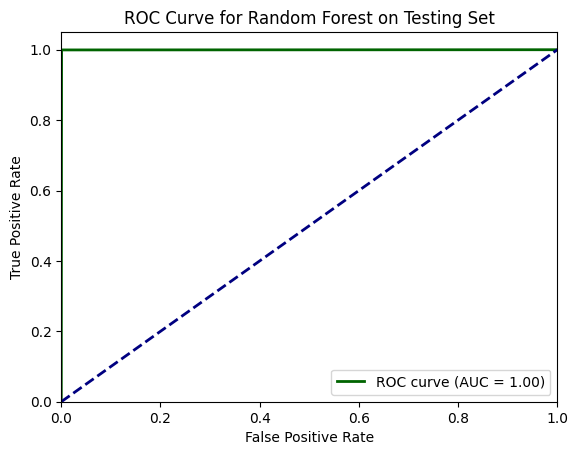

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the random forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf_val = model_rf.predict(X_val)

# Evaluate the random forest model on the validation set
accuracy_rf_val = accuracy_score(y_val, y_pred_rf_val)
precision_rf_val = precision_score(y_val, y_pred_rf_val)
recall_rf_val = recall_score(y_val, y_pred_rf_val)
f1_rf_val = f1_score(y_val, y_pred_rf_val)
auc_roc_rf_val = roc_auc_score(y_val, y_pred_rf_val)

# Print the evaluation metrics for random forest on the validation set
print("Random Forest Validation Evaluation Metrics:")
print("Accuracy:", accuracy_rf_val)
print("Precision:", precision_rf_val)
print("Recall:", recall_rf_val)
print("F1 Score:", f1_rf_val)
print("AUC-ROC:", auc_roc_rf_val)

# Make predictions on the testing set
y_pred_rf_test = model_rf.predict(X_test)

# Evaluate the random forest model on the testing set
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
precision_rf_test = precision_score(y_test, y_pred_rf_test)
recall_rf_test = recall_score(y_test, y_pred_rf_test)
f1_rf_test = f1_score(y_test, y_pred_rf_test)
auc_roc_rf_test = roc_auc_score(y_test, y_pred_rf_test)

# Print the evaluation metrics for random forest on the testing set
print("Random Forest Testing Evaluation Metrics:")
print("Accuracy:", accuracy_rf_test)
print("Precision:", precision_rf_test)
print("Recall:", recall_rf_test)
print("F1 Score:", f1_rf_test)
print("AUC-ROC:", auc_roc_rf_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the random forest model on the testing set
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf_test)

# Calculate the area under the ROC curve (AUC-ROC) for the random forest model on the testing set
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_test)

# Plot the ROC curve for the random forest model on the testing set
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest on Testing Set')
plt.legend(loc="lower right")
plt.show()

KNN

KNN Validation Evaluation Metrics:
Accuracy: 0.9992
Precision: 0.9988059701492538
Recall: 0.9996016729735112
F1 Score: 0.9992036631495123
AUC-ROC: 0.9991983058581154
KNN Testing Evaluation Metrics:
Accuracy: 0.9991
Precision: 0.9995979091274628
Recall: 0.9985940951998393
F1 Score: 0.9990957500251182
AUC-ROC: 0.9990978840866752


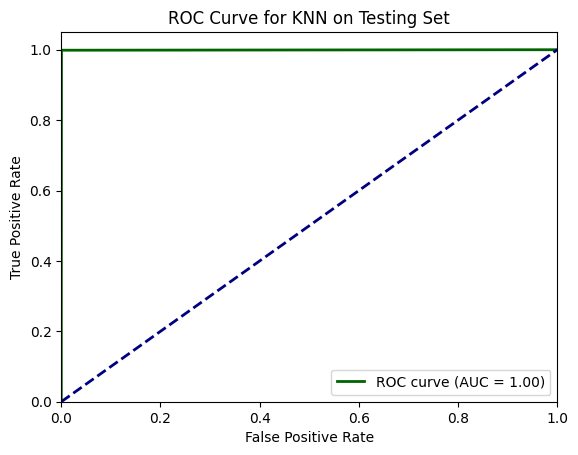

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_knn_val = model_knn.predict(X_val)

# Evaluate the KNN model on the validation set
accuracy_knn_val = accuracy_score(y_val, y_pred_knn_val)
precision_knn_val = precision_score(y_val, y_pred_knn_val)
recall_knn_val = recall_score(y_val, y_pred_knn_val)
f1_knn_val = f1_score(y_val, y_pred_knn_val)
auc_roc_knn_val = roc_auc_score(y_val, y_pred_knn_val)

# Print the evaluation metrics for KNN on the validation set
print("KNN Validation Evaluation Metrics:")
print("Accuracy:", accuracy_knn_val)
print("Precision:", precision_knn_val)
print("Recall:", recall_knn_val)
print("F1 Score:", f1_knn_val)
print("AUC-ROC:", auc_roc_knn_val)

# Make predictions on the testing set
y_pred_knn_test = model_knn.predict(X_test)

# Evaluate the KNN model on the testing set
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
precision_knn_test = precision_score(y_test, y_pred_knn_test)
recall_knn_test = recall_score(y_test, y_pred_knn_test)
f1_knn_test = f1_score(y_test, y_pred_knn_test)
auc_roc_knn_test = roc_auc_score(y_test, y_pred_knn_test)

# Print the evaluation metrics for KNN on the testing set
print("KNN Testing Evaluation Metrics:")
print("Accuracy:", accuracy_knn_test)
print("Precision:", precision_knn_test)
print("Recall:", recall_knn_test)
print("F1 Score:", f1_knn_test)
print("AUC-ROC:", auc_roc_knn_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the KNN model on the testing set
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn_test)

# Calculate the area under the ROC curve (AUC-ROC) for the KNN model on the testing set
auc_roc_knn = roc_auc_score(y_test, y_pred_knn_test)

# Plot the ROC curve for the KNN model on the testing set
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN on Testing Set')
plt.legend(loc="lower right")
plt.show()

SVM

SVM Validation Evaluation Metrics:
Accuracy: 0.9974
Precision: 0.9964221824686941
Recall: 0.998406691894045
F1 Score: 0.9974134500596895
AUC-ROC: 0.9973957540611015
SVM Testing Evaluation Metrics:
Accuracy: 0.9977
Precision: 0.9967923015236567
Recall: 0.9985940951998393
F1 Score: 0.9976923848700712
AUC-ROC: 0.9977037394939647


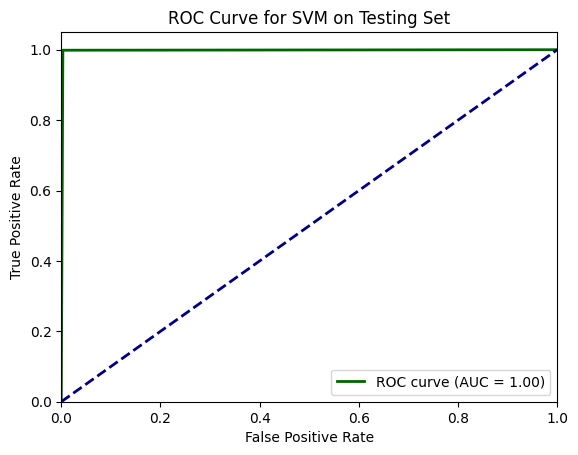

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the SVM model
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm_val = model_svm.predict(X_val)

# Evaluate the SVM model on the validation set
accuracy_svm_val = accuracy_score(y_val, y_pred_svm_val)
precision_svm_val = precision_score(y_val, y_pred_svm_val)
recall_svm_val = recall_score(y_val, y_pred_svm_val)
f1_svm_val = f1_score(y_val, y_pred_svm_val)
auc_roc_svm_val = roc_auc_score(y_val, y_pred_svm_val)

# Print the evaluation metrics for SVM on the validation set
print("SVM Validation Evaluation Metrics:")
print("Accuracy:", accuracy_svm_val)
print("Precision:", precision_svm_val)
print("Recall:", recall_svm_val)
print("F1 Score:", f1_svm_val)
print("AUC-ROC:", auc_roc_svm_val)

# Make predictions on the testing set
y_pred_svm_test = model_svm.predict(X_test)

# Evaluate the SVM model on the testing set
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
precision_svm_test = precision_score(y_test, y_pred_svm_test)
recall_svm_test = recall_score(y_test, y_pred_svm_test)
f1_svm_test = f1_score(y_test, y_pred_svm_test)
auc_roc_svm_test = roc_auc_score(y_test, y_pred_svm_test)

# Print the evaluation metrics for SVM on the testing set
print("SVM Testing Evaluation Metrics:")
print("Accuracy:", accuracy_svm_test)
print("Precision:", precision_svm_test)
print("Recall:", recall_svm_test)
print("F1 Score:", f1_svm_test)
print("AUC-ROC:", auc_roc_svm_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the SVM model on the testing set
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm_test)

# Calculate the area under the ROC curve (AUC-ROC) for the SVM model on the testing set
auc_roc_svm = roc_auc_score(y_test, y_pred_svm_test)

# Plot the ROC curve for the SVM model on the testing set
plt.plot(fpr_svm, tpr_svm, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM on Testing Set')
plt.legend(loc="lower right")
plt.show()

Logistic Regression Validation Evaluation Metrics:
Accuracy: 0.9964
Precision: 0.9948381973396864
Recall: 0.9980083648675563
F1 Score: 0.9964207595943528
AUC-ROC: 0.9963932163763368
Logistic Regression Testing Evaluation Metrics:
Accuracy: 0.9969
Precision: 0.9951961569255404
Recall: 0.9985940951998393
F1 Score: 0.996892230576441
AUC-ROC: 0.9969070854409872


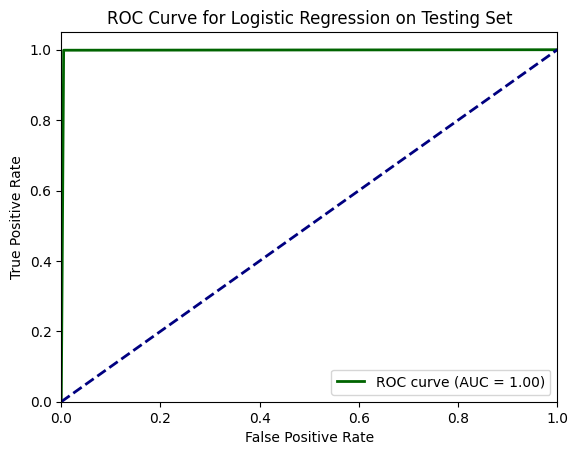

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr_val = model_lr.predict(X_val)

# Evaluate the logistic regression model on the validation set
accuracy_lr_val = accuracy_score(y_val, y_pred_lr_val)
precision_lr_val = precision_score(y_val, y_pred_lr_val)
recall_lr_val = recall_score(y_val, y_pred_lr_val)
f1_lr_val = f1_score(y_val, y_pred_lr_val)
auc_roc_lr_val = roc_auc_score(y_val, y_pred_lr_val)

# Print the evaluation metrics for logistic regression on the validation set
print("Logistic Regression Validation Evaluation Metrics:")
print("Accuracy:", accuracy_lr_val)
print("Precision:", precision_lr_val)
print("Recall:", recall_lr_val)
print("F1 Score:", f1_lr_val)
print("AUC-ROC:", auc_roc_lr_val)

# Make predictions on the testing set
y_pred_lr_test = model_lr.predict(X_test)

# Evaluate the logistic regression model on the testing set
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
precision_lr_test = precision_score(y_test, y_pred_lr_test)
recall_lr_test = recall_score(y_test, y_pred_lr_test)
f1_lr_test = f1_score(y_test, y_pred_lr_test)
auc_roc_lr_test = roc_auc_score(y_test, y_pred_lr_test)

# Print the evaluation metrics for logistic regression on the testing set
print("Logistic Regression Testing Evaluation Metrics:")
print("Accuracy:", accuracy_lr_test)
print("Precision:", precision_lr_test)
print("Recall:", recall_lr_test)
print("F1 Score:", f1_lr_test)
print("AUC-ROC:", auc_roc_lr_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the logistic regression model on the testing set
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr_test)

# Calculate the area under the ROC curve (AUC-ROC) for the logistic regression model on the testing set
auc_roc_lr = roc_auc_score(y_test, y_pred_lr_test)

# Plot the ROC curve for the logistic regression model on the testing set
plt.plot(fpr_lr, tpr_lr, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression on Testing Set')
plt.legend(loc="lower right")
plt.show()

ExtraTreesClassifier Validation Evaluation Metrics:
Accuracy: 0.9998
Precision: 0.9998008364867557
Recall: 0.9998008364867557
F1 Score: 0.9998008364867557
AUC-ROC: 0.9997999964719378
ExtraTreesClassifier Testing Evaluation Metrics:
Accuracy: 0.9998
Precision: 1.0
Recall: 0.9995983129142398
F1 Score: 0.9997991161108879
AUC-ROC: 0.9997991564571199


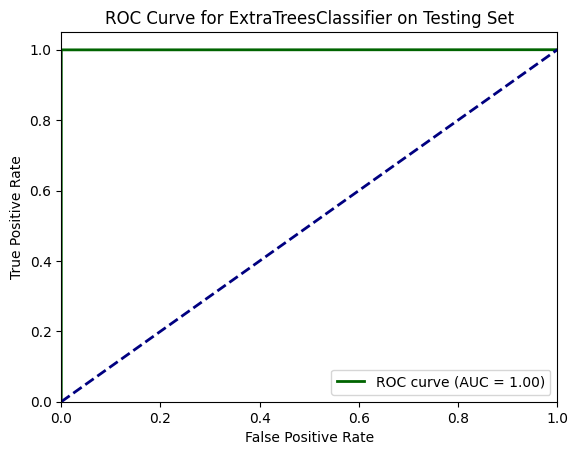

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the ExtraTreesClassifier model
model_etc = ExtraTreesClassifier()
model_etc.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_etc_val = model_etc.predict(X_val)

# Evaluate the ExtraTreesClassifier model on the validation set
accuracy_etc_val = accuracy_score(y_val, y_pred_etc_val)
precision_etc_val = precision_score(y_val, y_pred_etc_val)
recall_etc_val = recall_score(y_val, y_pred_etc_val)
f1_etc_val = f1_score(y_val, y_pred_etc_val)
auc_roc_etc_val = roc_auc_score(y_val, y_pred_etc_val)

# Print the evaluation metrics for ExtraTreesClassifier on the validation set
print("ExtraTreesClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_etc_val)
print("Precision:", precision_etc_val)
print("Recall:", recall_etc_val)
print("F1 Score:", f1_etc_val)
print("AUC-ROC:", auc_roc_etc_val)

# Make predictions on the testing set
y_pred_etc_test = model_etc.predict(X_test)

# Evaluate the ExtraTreesClassifier model on the testing set
accuracy_etc_test = accuracy_score(y_test, y_pred_etc_test)
precision_etc_test = precision_score(y_test, y_pred_etc_test)
recall_etc_test = recall_score(y_test, y_pred_etc_test)
f1_etc_test = f1_score(y_test, y_pred_etc_test)
auc_roc_etc_test = roc_auc_score(y_test, y_pred_etc_test)

# Print the evaluation metrics for ExtraTreesClassifier on the testing set
print("ExtraTreesClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_etc_test)
print("Precision:", precision_etc_test)
print("Recall:", recall_etc_test)
print("F1 Score:", f1_etc_test)
print("AUC-ROC:", auc_roc_etc_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the ExtraTreesClassifier model on the testing set
fpr_etc, tpr_etc, thresholds_etc = roc_curve(y_test, y_pred_etc_test)

# Calculate the area under the ROC curve (AUC-ROC) for the ExtraTreesClassifier model on the testing set
auc_roc_etc = roc_auc_score(y_test, y_pred_etc_test)

# Plot the ROC curve for the ExtraTreesClassifier model on the testing set
plt.plot(fpr_etc, tpr_etc, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_etc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ExtraTreesClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()

MLP

MLPClassifier Validation Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9992038216560509
Recall: 0.9998008364867557
F1 Score: 0.9995022399203584
AUC-ROC: 0.9994987311576177
MLPClassifier Testing Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9995982322217758
Recall: 0.9993974693713598
F1 Score: 0.999497840715075
AUC-ROC: 0.9994995711724354


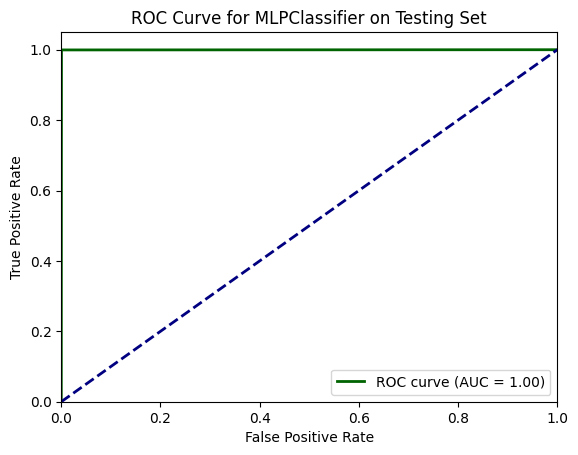

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the MLPClassifier model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, activation='relu', solver='adam', random_state=42)
model_mlp.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_mlp_val = model_mlp.predict(X_val)

# Evaluate the MLPClassifier model on the validation set
accuracy_mlp_val = accuracy_score(y_val, y_pred_mlp_val)
precision_mlp_val = precision_score(y_val, y_pred_mlp_val)
recall_mlp_val = recall_score(y_val, y_pred_mlp_val)
f1_mlp_val = f1_score(y_val, y_pred_mlp_val)
auc_roc_mlp_val = roc_auc_score(y_val, y_pred_mlp_val)

# Print the evaluation metrics for MLPClassifier on the validation set
print("MLPClassifier Validation Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_val)
print("Precision:", precision_mlp_val)
print("Recall:", recall_mlp_val)
print("F1 Score:", f1_mlp_val)
print("AUC-ROC:", auc_roc_mlp_val)

# Make predictions on the testing set
y_pred_mlp_test = model_mlp.predict(X_test)

# Evaluate the MLPClassifier model on the testing set
accuracy_mlp_test = accuracy_score(y_test, y_pred_mlp_test)
precision_mlp_test = precision_score(y_test, y_pred_mlp_test)
recall_mlp_test = recall_score(y_test, y_pred_mlp_test)
f1_mlp_test = f1_score(y_test, y_pred_mlp_test)
auc_roc_mlp_test = roc_auc_score(y_test, y_pred_mlp_test)

# Print the evaluation metrics for MLPClassifier on the testing set
print("MLPClassifier Testing Evaluation Metrics:")
print("Accuracy:", accuracy_mlp_test)
print("Precision:", precision_mlp_test)
print("Recall:", recall_mlp_test)
print("F1 Score:", f1_mlp_test)
print("AUC-ROC:", auc_roc_mlp_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the MLPClassifier model on the testing set
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, y_pred_mlp_test)

# Calculate the area under the ROC curve (AUC-ROC) for the MLPClassifier model on the testing set
auc_roc_mlp = roc_auc_score(y_test, y_pred_mlp_test)

# Plot the ROC curve for the MLPClassifier model on the testing set
plt.plot(fpr_mlp, tpr_mlp, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLPClassifier on Testing Set')
plt.legend(loc="lower right")
plt.show()

LSTM

Epoch 1/50
2500/2500 [==============================] - 48s 17ms/step - loss: 0.0326 - accuracy: 0.9888
Epoch 2/50
2500/2500 [==============================] - 42s 17ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 3/50
2500/2500 [==============================] - 41s 16ms/step - loss: 0.0060 - accuracy: 0.9986
Epoch 4/50
2500/2500 [==============================] - 41s 17ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 5/50
2500/2500 [==============================] - 42s 17ms/step - loss: 0.0036 - accuracy: 0.9988
Epoch 6/50
2500/2500 [==============================] - 42s 17ms/step - loss: 0.0030 - accuracy: 0.9992
Epoch 7/50
2500/2500 [==============================] - 41s 17ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 8/50
2500/2500 [==============================] - 41s 17ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 9/50
2500/2500 [==============================] - 40s 16ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 10/50
2500/2500 [==============================] - 41s 16m

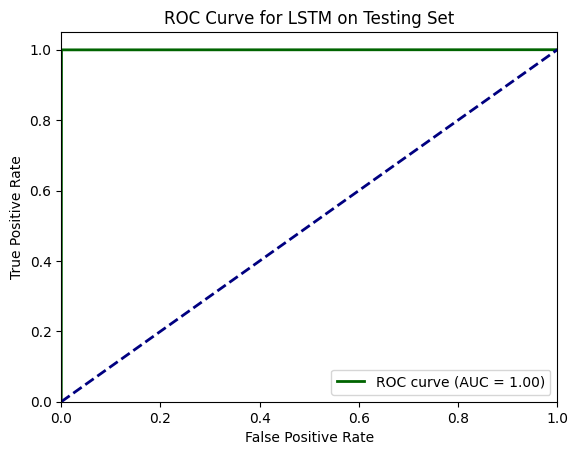

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions on the validation set
y_pred_lstm_val = model_lstm.predict(X_val)
y_pred_lstm_val = (y_pred_lstm_val > 0.5)

# Evaluate the LSTM model on the validation set
accuracy_lstm_val = accuracy_score(y_val, y_pred_lstm_val)
precision_lstm_val = precision_score(y_val, y_pred_lstm_val)
recall_lstm_val = recall_score(y_val, y_pred_lstm_val)
f1_lstm_val = f1_score(y_val, y_pred_lstm_val)
auc_roc_lstm_val = roc_auc_score(y_val, y_pred_lstm_val)

# Print the evaluation metrics for LSTM on the validation set
print("LSTM Validation Evaluation Metrics:")
print("Accuracy:", accuracy_lstm_val)
print("Precision:", precision_lstm_val)
print("Recall:", recall_lstm_val)
print("F1 Score:", f1_lstm_val)
print("AUC-ROC:", auc_roc_lstm_val)

# Make predictions on the testing set
y_pred_lstm_test = model_lstm.predict(X_test)
y_pred_lstm_test = (y_pred_lstm_test > 0.5)

# Evaluate the LSTM model on the testing set
accuracy_lstm_test = accuracy_score(y_test, y_pred_lstm_test)
precision_lstm_test = precision_score(y_test, y_pred_lstm_test)
recall_lstm_test = recall_score(y_test, y_pred_lstm_test)
f1_lstm_test = f1_score(y_test, y_pred_lstm_test)
auc_roc_lstm_test = roc_auc_score(y_test, y_pred_lstm_test)

# Print the evaluation metrics for LSTM on the testing set
print("LSTM Testing Evaluation Metrics:")
print("Accuracy:", accuracy_lstm_test)
print("Precision:", precision_lstm_test)
print("Recall:", recall_lstm_test)
print("F1 Score:", f1_lstm_test)
print("AUC-ROC:", auc_roc_lstm_test)

# Calculate the false positive rate (FPR) and true positive rate (TPR) for the LSTM model on the testing set
fpr_lstm, tpr_lstm, thresholds_lstm = roc_curve(y_test, y_pred_lstm_test)

# Calculate the area under the ROC curve (AUC-ROC) for the LSTM model on the testing set
auc_roc_lstm = roc_auc_score(y_test, y_pred_lstm_test)

# Plot the ROC curve for the LSTM model on the testing set
plt.plot(fpr_lstm, tpr_lstm, color='darkgreen', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc_lstm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM on Testing Set')
plt.legend(loc="lower right")
plt.show()